# DATA 601 Midterm Project
# Severe Thunderstorm Climatology vs Sunspot Number 2019-2020
## Python weather analysis application that compares the occurrence of severe thunderstorm activity occurring over the continental Unites States to daily international sunspot number measurements.

### Overview: December 2019 was confirmed as the starting point of the new solar activity cycle, in which sunspot activity was observed to be at an 11-year minimum. Through the winter and spring of 2020, sunspot number gradually increased with corresponding significant severe thunderstorm outbreaks occurring in the continental United States (CONUS) during February and April 2020.

<img src= "images/prediSC.png"> 

### Abstract:
The reference date and amplitudes of the minima and maxima of the 11-year solar cycle are established based on the sunspot number maintained and distributed by the SILSO World Datacenter since 1981 at the Royal Observatory of Belgium. Sunspots are dark areas that become apparent at the Sun's photosphere due to intense upward-forced magnetic flux from further within the solar interior. Heating areas along the magnetic flux in the upper photosphere and chromosphere become visible as faculae, causing cooler (7000 F), less dense, and darker areas at the core of these magnetic fields than in the surrounding photosphere (10,000 F). The resulting visible phenomenon is thus seen as sunspots. Active regions associated with sunspot groups are usually visible as bright enhancements in the corona at EUV and X-ray wavelengths.  Clette et al. (2014) provide a historical review and perspective of the development and evolution of sunspot number calculation techniques, most notably the International Sunspot Number.  Recent studies of the potential impact of sunspot activity on global weather and climate patterns have identified relationships between sunspot number and, collectively, south Asian Monsoon rainfall patterns (Rao 1976) and thunderstorm activity over central Europe (Schlegel et al. 2001).  Schlegel et al. (2001), based on a comparison of monthly-averaged sunspot number and lightning stroke frequency, inferred a significant functional relationship between sunspot number and thunderstorm activity over central Europe (R > 0.53, see Figure 2 below). However, this study only focused on warm-season (i.e., April to September) thunderstorm occurrence. Thunderstorm outbreaks during the cold season of the year (i.e., the months of November through March/April) typically occur in environments with low amounts of convective available potential energy (CAPE) and solar heating of the earth's surface. Cold-season severe thunderstorms are often generated by the release of potential instability by large-scale forcing. Thus, another enhancing factor for cold-season severe thunderstorms should be explored to describe storm outbreaks on a regional scale. The period from January to April 2020 exhibited several thunderstorm episodes that increased in magnitude with the new solar cycle's commencement.

### Introduction: 
Thunderstorm wind reports over CONUS are obtained via WxData API (https://wxdata.com/api-storm-reports-explorer), and corresponding daily sunspot number values are obtained from the Sunspot Index and Long-term Solar Observations (SILSO) website (http://sidc.be/silso/datafiles). Since lightning is relatively rare during the cold season, measurements of severe wind (i.e., wind > 40 miles per hour (mph)) associated with convective storms is selected as a proxy variable of thunderstorm occurrence. The total number of wind reports is calculated for each semi-monthly period between November 2019 and April 2020 and compared to the sum of daily sunspot number values for each semi-monthly period. Linear regression is selected as the most appropriate model in which to derive a functional relationship. For the study period (November 2019 - April 2020), coefficient of determination, correlation coefficient, and explained variance are calculated for a dataset of 12 storm wind report and sunspot number totals to assess model performance. Thus, this study expands upon Schlegel et al. (2001) by analyzing sunspot and thunderstorm totals on a semi-monthly time scale during the cold season of the year.

### Research Questions:
1. What is the relationship between sunspot number and cold-season severe thunderstorm frequency?
2. How can this relationship be quantified, modeled, and assessed?


<img src= "images/Fig1.png"> 

### Figure 1. Graphical description of sunspots and associated faculae.

## Exploratory Data Analysis (EDA): Invoke Requests to call the WxData Storm Reports API Builder.

In [3]:
#Load modules and invoke WxData API
from __future__ import print_function, division
import numpy as np
import pandas as pd 
import sys
import requests
import xmltodict

#Invoke requests to call the WxData Storm Reports API Builder. Execute an API call for each semi-monthly period between November 2019 and April 2020.
#See https://wxdata.com/storm-reports-api-format#event
nov2019_1 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2019-11-01T00:00:00&enddate=2019-11-16T00:00:00&event=tstm+wnd+gst"
nov2019_2 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2019-11-16T00:00:00&enddate=2019-12-01T00:00:00&event=tstm+wnd+gst"
dec2019_1 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2019-12-01T00:00:00&enddate=2019-12-16T00:00:00&event=tstm+wnd+gst"
dec2019_2 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2019-12-16T00:00:00&enddate=2020-01-01T00:00:00&event=tstm+wnd+gst"
jan2020_1 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2020-01-01T00:00:00&enddate=2020-01-16T00:00:00&event=tstm+wnd+gst"
jan2020_2 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2020-01-16T00:00:00&enddate=2020-02-01T00:00:00&event=marine+tstm+wind"
feb2020_1 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2020-02-01T00:00:00&enddate=2020-02-15T00:00:00&event=tstm+wnd+gst"
feb2020_2 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2020-02-15T00:00:00&enddate=2020-03-01T00:00:00&event=tstm+wnd+gst"
mar2020_1 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2020-03-01T00:00:00&enddate=2020-03-16T00:00:00&event=tstm+wnd+gst"
mar2020_2 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2020-03-16T00:00:00&enddate=2020-04-01T00:00:00&event=tstm+wnd+gst"
apr2020_1 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2020-04-01T00:00:00&enddate=2020-04-16T00:00:00&event=tstm+wnd+gst"
apr2020_2 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2020-04-16T00:00:00&enddate=2020-04-30T23:00:00&event=tstm+wnd+gst"



## Read daily total sunspot number dataset obtained from SILSO.

In [4]:
#Read daily total sunspot number dataset obtained from SILSO
fname1 = 'data\SN_d_tot_V2.0_2019_2020.txt' #Modified Daily total sunspot number dataset obtained from SILSO
#Read SILSO dataset
sunspot_no = np.loadtxt(fname1, dtype='str', usecols=range(0, 4))

#Build Pandas series objects for each column in the original dataset
year,month,day,sunspotnr = np.loadtxt(fname1, usecols=range(0, 4), unpack=True)
year_list = pd.Series(year,dtype='int32')
month_list = pd.Series(month,dtype='int32')
day_list = pd.Series(day,dtype='int32')
sunspot_nr = pd.Series(sunspotnr,dtype='int32')

#Build Pandas dataframe from each series object and print as a table
sunspot_2019_2020 = pd.DataFrame({'Year':year_list,'Month':month_list,'Day':day_list,'Sunspot No.':sunspot_nr})
sunspot_titles = ['Year','Month','Day','Sunspot No.']
sunspot_2019_2020 = sunspot_2019_2020[sunspot_titles]
print(sunspot_2019_2020)

     Year  Month  Day  Sunspot No.
0    2019     10    1            6
1    2019     10    2            6
2    2019     10    3            0
3    2019     10    4            0
4    2019     10    5            0
5    2019     10    6            0
6    2019     10    7            0
7    2019     10    8            0
8    2019     10    9            0
9    2019     10   10            0
10   2019     10   11            0
11   2019     10   12            0
12   2019     10   13            0
13   2019     10   14            0
14   2019     10   15            0
15   2019     10   16            0
16   2019     10   17            0
17   2019     10   18            0
18   2019     10   19            0
19   2019     10   20            0
20   2019     10   21            0
21   2019     10   22            0
22   2019     10   23            0
23   2019     10   24            0
24   2019     10   25            0
25   2019     10   26            0
26   2019     10   27            0
27   2019     10   2

## EDA/Data Cleaning: Define a function that builds a storm report listing for each semi-monthly period between November 2019 and April 2020.

In [5]:
#Function that builds a storm report listing for each semi-monthly period between November 2019 and April 2020.
def dataframe_strmrpt(sr_month):
    responsewx = requests.get(sr_month)
    wxdata_sr = responsewx.content
    xmlDict = xmltodict.parse(wxdata_sr) #Build storm report dictionary from XML files
    
    #Initiate lists for each storm report attribuite
    id = [] #Report ID of each severe thunderstorm event
    mag = [] #Thunderstorm wind gust magnitude in units of miles per hour (MPH)
    state = [] #US state of occurrence of severe thunderstorm event
    date = [] #Date and time of occurrence of severe thunderstorm event
    
    if xmlDict['response']['data'].get('storm-report')!=None: #Test for the existence of storm reports for the period of interest
        print("The key 'storm-report' is present.\n") 
        #If storm reports are present, build the storm report list
        for stormreports in xmlDict['response']['data']['storm-report']:
            id.append(stormreports['id'])
            mag.append(stormreports['magnitude'])
            state.append(stormreports['state'])
            date.append(stormreports['event_local_time'])

        # Reversing a list using reverse() 
        def Reverse(lst): 
            lst.reverse() 
            return lst 
        #Build Pandas series for each storm report attribuite
        sr_id = pd.Series(Reverse(id))
        sr_date = pd.Series(Reverse(date))
        sr_state = pd.Series(Reverse(state))
        sr_mag = pd.Series(Reverse(mag))
        #Build a Pandas dataframe from each individual storm report series
        #Extract maximum thunderstorm wind measurement in units of miles per hour (MPH) for each semi-monthly period
        wxdata_df = pd.DataFrame({'ID':sr_id,'Date':sr_date,'State':sr_state,'Magnitude':sr_mag})
        #Clean dataset, remove MPH label from string, save each wind report as an integer 
        wxdata_df['Magnitude'] = wxdata_df['Magnitude'].str.replace(r'\M', '')
        wxdata_df['Magnitude'] = wxdata_df['Magnitude'].str.replace(r'\E', '')
        wxdata_df['Magnitude'] = wxdata_df['Magnitude'].str.replace(r'\PH', '')
        wxdata_df['Magnitude'] = wxdata_df['Magnitude'].str.replace(r'\.00', '')
        wxdata_df['Magnitude'] = wxdata_df['Magnitude'].astype(int)
        maxmag = np.amax(wxdata_df['Magnitude']) #Extract maximum wind gust magnitude for semi-monthly period
        strmrpt_nr = len(wxdata_df.Magnitude) #Count number of storm reports for semi-monthly period
    
    else: 
        #If no storm reports exist, set analysis parameters = 0 and the dataframe = None
        print("The key 'storm-report' does not exist in the dictionary.") 
        wxdata_df = 'None'
        strmrpt_nr = 0
        maxmag = 0
    return wxdata_df, maxmag, strmrpt_nr #Return storm report dataframe and descriptive statistics

## EDA: Print storm report and sunspot number lists for November - December 2019

In [6]:
df_wxdata_nov2019e, maxmag_nov2019e, strmrpt_nr_nov2019e = dataframe_strmrpt(nov2019_1)
print("November 1-15 storm wind reports:")
print(df_wxdata_nov2019e)
print("Maximum wind magnitude: ", maxmag_nov2019e)
print("Number of storm reports: ", strmrpt_nr_nov2019e)
totsunspot_nr_nov2019e = sunspot_2019_2020.iloc[31:46, 3].sum() #Calculate sum of daily sunspot number over 15-day period
meansunspot_nr_nov2019e = totsunspot_nr_nov2019e/15 #Calculate mean daily sunspot number over 15-day period
print("Sunspot number: ", totsunspot_nr_nov2019e)
print("Mean Sunspot number: ", meansunspot_nr_nov2019e)
print("")

df_wxdata_nov2019l, maxmag_nov2019l, strmrpt_nr_nov2019l = dataframe_strmrpt(nov2019_2)
print("November 16-30 storm wind reports:")
print(df_wxdata_nov2019l)
print("Maximum wind magnitude: ", maxmag_nov2019l)
print("Number of storm reports: ", strmrpt_nr_nov2019l)
totsunspot_nr_nov2019l = sunspot_2019_2020.iloc[46:61, 3].sum() #Calculate sum of daily sunspot number over 15-day period
meansunspot_nr_nov2019l = totsunspot_nr_nov2019l/15 #Calculate mean daily sunspot number over 15-day period
print("Sunspot number: ", totsunspot_nr_nov2019l)
print("Mean Sunspot number: ", meansunspot_nr_nov2019l)
print("")

df_wxdata_dec2019e, maxmag_dec2019e, strmrpt_nr_dec2019e = dataframe_strmrpt(dec2019_1)
print("December 1-15 storm wind reports:")
print(df_wxdata_dec2019e)
print("Maximum wind magnitude: ", maxmag_dec2019e)
print("Number of storm reports: ", strmrpt_nr_dec2019e)
totsunspot_nr_dec2019e = sunspot_2019_2020.iloc[61:76, 3].sum() #Calculate sum of daily sunspot number over 15-day period
meansunspot_nr_dec2019e = totsunspot_nr_dec2019e/15 #Calculate mean daily sunspot number over 15-day period
print("Sunspot number: ", totsunspot_nr_dec2019e)
print("Mean Sunspot number: ", meansunspot_nr_dec2019e)
print("")

df_wxdata_dec2019l, maxmag_dec2019l, strmrpt_nr_dec2019l = dataframe_strmrpt(dec2019_2)
print("December 16-31 storm wind reports:")
print(df_wxdata_dec2019l)
print("Maximum wind magnitude: ", maxmag_dec2019l)
print("Number of storm reports: ", strmrpt_nr_dec2019l)
totsunspot_nr_dec2019l = sunspot_2019_2020.iloc[76:92, 3].sum() #Calculate sum of daily sunspot number over 16-day period
meansunspot_nr_dec2019l = totsunspot_nr_dec2019l/16 #Calculate mean daily sunspot number over 16-day period
print("Sunspot number: ", totsunspot_nr_dec2019l)
print("Mean Sunspot number: ", meansunspot_nr_dec2019l)
print("")

The key 'storm-report' is present.

November 1-15 storm wind reports:
                   Date      ID  Magnitude State
0   2019-11-01 01:13:00  812676         67    NJ
1   2019-11-01 01:18:00  812761         65    NJ
2   2019-11-01 01:21:00  812669         56    NY
3   2019-11-01 01:53:00  812612         53    NY
4   2019-11-01 12:02:00  812588         59    DE
5   2019-11-01 12:40:00  812914         76    VA
6   2019-11-01 12:41:00  812915         59    VA
7   2019-11-01 12:45:00  812607         57    NJ
8   2019-11-01 12:54:00  812856         60    NY
9   2019-11-04 21:47:00  813680         43    FL
10  2019-11-04 22:30:00  813681         51    FL
11  2019-11-04 22:40:00  813682         47    FL
12  2019-11-09 01:01:00  814384         42    FL
13  2019-11-09 01:50:00  814385         39    FL
14  2019-11-09 01:50:00  814399         39    FL
15  2019-11-09 02:10:00  814386         40    FL
16  2019-11-09 02:10:00  814400         40    FL
17  2019-11-09 02:25:00  814387         43    FL

## EDA: Print storm report and sunspot number lists for January - February 2020

In [7]:
df_wxdata_jan2020e, maxmag_jan2020e, strmrpt_nr_jan2020e = dataframe_strmrpt(jan2020_1)
print("January 1-15 storm wind reports:")
print(df_wxdata_jan2020e)
print("Maximum wind magnitude: ", maxmag_jan2020e)
print("Number of storm reports: ", strmrpt_nr_jan2020e)
totsunspot_nr_jan2020e = sunspot_2019_2020.iloc[92:107, 3].sum() #Calculate sum of daily sunspot number over 15-day period
meansunspot_nr_jan2020e = totsunspot_nr_jan2020e/15 #Calculate mean daily sunspot number over 15-day period
print("Sunspot number: ", totsunspot_nr_jan2020e)
print("Mean Sunspot number: ", meansunspot_nr_jan2020e)
print("")

df_wxdata_jan2020l, maxmag_jan2020l, strmrpt_nr_jan2020l = dataframe_strmrpt(jan2020_2)
print("January 16-31 storm wind reports:")
print(df_wxdata_jan2020l)
print("Maximum wind magnitude: ", maxmag_jan2020l)
print("Number of storm reports: ", strmrpt_nr_jan2020l)
totsunspot_nr_jan2020l = sunspot_2019_2020.iloc[107:123, 3].sum() #Calculate sum of daily sunspot number over 16-day period
meansunspot_nr_jan2020l = totsunspot_nr_jan2020l/16 #Calculate mean daily sunspot number over 16-day period
print("Sunspot number: ", totsunspot_nr_jan2020l)
print("Mean Sunspot number: ", meansunspot_nr_jan2020l)
print("")

df_wxdata_feb2020e, maxmag_feb2020e, strmrpt_nr_feb2020e = dataframe_strmrpt(feb2020_1)
print("February 1-14 storm wind reports:")
print(df_wxdata_feb2020e)
print("Maximum wind magnitude: ", maxmag_feb2020e)
print("Number of storm reports: ", strmrpt_nr_feb2020e)
totsunspot_nr_feb2020e = sunspot_2019_2020.iloc[123:137, 3].sum() #Calculate sum of daily sunspot number over 14-day period
meansunspot_nr_feb2020e = totsunspot_nr_feb2020e/14 #Calculate mean daily sunspot number over 14-day period
print("Sunspot number: ", totsunspot_nr_feb2020e)
print("Mean Sunspot number: ", meansunspot_nr_feb2020e)
print("")

df_wxdata_feb2020l, maxmag_feb2020l, strmrpt_nr_feb2020l = dataframe_strmrpt(feb2020_2)
print("February 15-29 storm wind reports:")
print(df_wxdata_feb2020l)
print("Maximum wind magnitude: ", maxmag_feb2020l)
print("Number of storm reports: ", strmrpt_nr_feb2020l)
totsunspot_nr_feb2020l = sunspot_2019_2020.iloc[137:152, 3].sum() #Calculate sum of daily sunspot number over 15-day period
meansunspot_nr_feb2020l = totsunspot_nr_feb2020l/15 #Calculate mean daily sunspot number over 15-day period
print("Sunspot number: ", totsunspot_nr_feb2020l)
print("Mean Sunspot number: ", meansunspot_nr_jan2020l)
print("")

The key 'storm-report' is present.

January 1-15 storm wind reports:
                   Date      ID  Magnitude State
0   2020-01-04 12:55:00  839001         39    FL
1   2020-01-04 13:22:00  839013         42    FL
2   2020-01-04 13:30:00  839012         39    FL
3   2020-01-04 14:18:00  839016         41    FL
4   2020-01-04 14:34:00  839020         44    FL
5   2020-01-04 15:12:00  839173         43    XX
6   2020-01-04 16:15:00  839170         39    FL
7   2020-01-04 18:13:00  839243         40    FL
8   2020-01-10 17:43:00  841130         60    TX
9   2020-01-10 19:38:00  841196         66    TX
10  2020-01-10 19:48:00  842416         77    TX
11  2020-01-10 19:56:00  841203         59    TX
12  2020-01-10 20:19:00  841307         61    TX
13  2020-01-10 21:30:00  841211         60    TX
14  2020-01-11 01:41:00  841359         59    TX
15  2020-01-11 01:41:00  844249         59    TX
16  2020-01-11 02:01:00  841377         70    IL
17  2020-01-11 02:22:00  841374         69    TX


## EDA: Print storm report and sunspot number lists for March - April 2020

In [8]:
df_wxdata_mar2020e, maxmag_mar2020e, strmrpt_nr_mar2020e = dataframe_strmrpt(mar2020_1)
print("March 1-15 storm wind reports:")
print(df_wxdata_mar2020e)
print("Maximum wind magnitude: ", maxmag_mar2020e)
print("Number of storm reports: ", strmrpt_nr_mar2020e)
totsunspot_nr_mar2020e = sunspot_2019_2020.iloc[152:167, 3].sum() #Calculate sum of daily sunspot number over 15-day period
meansunspot_nr_mar2020e = totsunspot_nr_mar2020e/15 #Calculate mean daily sunspot number over 15-day period
print("Sunspot number: ", totsunspot_nr_mar2020e)
print("Mean Sunspot number: ", meansunspot_nr_mar2020e)
print("")

df_wxdata_mar2020l, maxmag_mar2020l, strmrpt_nr_mar2020l = dataframe_strmrpt(mar2020_2)
print("March 16-31 storm wind reports:")
print(df_wxdata_mar2020l)
print("Maximum wind magnitude: ", maxmag_mar2020l)
print("Number of storm reports: ", strmrpt_nr_mar2020l)
totsunspot_nr_mar2020l = sunspot_2019_2020.iloc[167:183, 3].sum() #Calculate sum of daily sunspot number over 16-day period
meansunspot_nr_mar2020l = totsunspot_nr_mar2020l/16 #Calculate mean daily sunspot number over 16-day period
print("Sunspot number: ", totsunspot_nr_mar2020l)
print("Mean Sunspot number: ", meansunspot_nr_mar2020l)
print("")

df_wxdata_apr2020e, maxmag_apr2020e, strmrpt_nr_apr2020e = dataframe_strmrpt(apr2020_1)
print("April 1-15 storm wind reports:")
print(df_wxdata_apr2020e)
print("Maximum wind magnitude: ", maxmag_apr2020e)
print("Number of storm reports: ", strmrpt_nr_apr2020e)
totsunspot_nr_apr2020e = sunspot_2019_2020.iloc[183:198, 3].sum() #Calculate sum of daily sunspot number over 15-day period
meansunspot_nr_apr2020e = totsunspot_nr_apr2020e/15 #Calculate mean daily sunspot number over 15-day period
print("Sunspot number: ", totsunspot_nr_apr2020e)
print("Mean Sunspot number: ", meansunspot_nr_apr2020e)
print("")

df_wxdata_apr2020l, maxmag_apr2020l, strmrpt_nr_apr2020l = dataframe_strmrpt(apr2020_2)
print("April 16-30 storm wind reports:")
print(df_wxdata_apr2020l)
print("Maximum wind magnitude: ", maxmag_apr2020l)
print("Number of storm reports: ", strmrpt_nr_apr2020l)
totsunspot_nr_apr2020l = sunspot_2019_2020.iloc[198:213, 3].sum() #Calculate sum of daily sunspot number over 15-day period
meansunspot_nr_apr2020l = totsunspot_nr_apr2020l/15 #Calculate mean daily sunspot number over 15-day period
print("Sunspot number: ", totsunspot_nr_apr2020l)
print("Mean Sunspot number: ", meansunspot_nr_apr2020l)

The key 'storm-report' is present.

March 1-15 storm wind reports:
                   Date      ID  Magnitude State
0   2020-03-03 01:19:00  866047         60    TN
1   2020-03-03 01:19:00  867446         60    TN
2   2020-03-03 17:37:00  866310         53    OH
3   2020-03-03 18:22:00  866312         45    OH
4   2020-03-03 18:40:00  866323         46    OH
5   2020-03-03 18:46:00  866325         52    OH
6   2020-03-03 19:53:00  866338         52    OH
7   2020-03-03 20:31:00  866341         54    PA
8   2020-03-03 20:55:00  866512         60    PA
9   2020-03-03 21:05:00  866490         53    PA
10  2020-03-03 21:22:00  866514         60    PA
11  2020-03-03 21:30:00  866516         62    PA
12  2020-03-03 21:31:00  866352         55    DE
13  2020-03-03 21:35:00  866500         51    NJ
14  2020-03-03 21:35:00  866517         50    NJ
15  2020-03-03 21:45:00  866501         48    NJ
16  2020-03-03 21:45:00  866502         56    NJ
17  2020-03-03 21:55:00  866438         60    MD
18

The key 'storm-report' is present.

April 16-30 storm wind reports:
                    Date      ID  Magnitude State
0    2020-04-18 11:06:00  883680         44    FL
1    2020-04-18 11:19:00  883679         44    FL
2    2020-04-18 13:06:00  883499         41    FL
3    2020-04-18 13:06:00  883585         41    FL
4    2020-04-18 13:21:00  883586         43    FL
5    2020-04-18 13:39:00  883487         41    FL
6    2020-04-18 13:39:00  883587         41    FL
7    2020-04-18 14:31:00  883588         42    FL
8    2020-04-18 14:44:00  883494         45    FL
9    2020-04-18 15:12:00  883497         39    FL
10   2020-04-18 18:23:00  883557         60    KS
11   2020-04-19 07:05:00  883608         56    AL
12   2020-04-19 12:50:00  883645         47    SC
13   2020-04-19 13:00:00  883654         49    SC
14   2020-04-19 13:08:00  883651         49    SC
15   2020-04-19 16:37:00  883736         63    TX
16   2020-04-19 17:02:00  883711         54    MS
17   2020-04-19 19:11:00  883737

## Plot time series of total sunspot number vs storm report number.

      Period  Total Sunspot No.  Mean Sunspot No.  Storm Report No.
0    11/1-15                 14          0.933333                38
1   11/16-30                  0          0.000000                17
2    12/1-15                  0          0.000000                 6
3   12/16-31                 47          2.937500                20
4     1/1-15                 91          6.066667                84
5    1/16-31                101          6.312500                11
6     2/1-14                  6          0.428571               158
7    2/15-29                  0          0.000000                17
8     3/1-15                 29          1.933333                39
9    3/16-31                 17          1.062500                63
10    4/1-15                 52          3.466667               263
11   4/16-30                104          6.933333               391


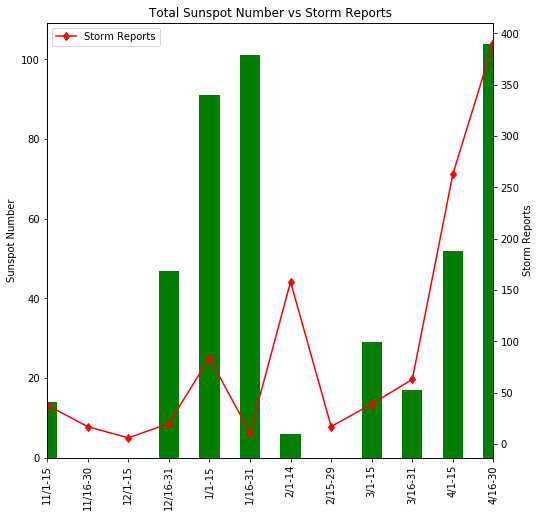

In [10]:
import matplotlib.pyplot as plt
import pandas as pd 
#Plot sunspot number vs storm report number
tss = pd.Series([totsunspot_nr_nov2019e, totsunspot_nr_nov2019l, totsunspot_nr_dec2019e, totsunspot_nr_dec2019l,
             totsunspot_nr_jan2020e, totsunspot_nr_jan2020l, totsunspot_nr_feb2020e, totsunspot_nr_feb2020l,
             totsunspot_nr_mar2020e, totsunspot_nr_mar2020l, totsunspot_nr_apr2020e, totsunspot_nr_apr2020l])
mss = pd.Series([meansunspot_nr_nov2019e, meansunspot_nr_nov2019l, meansunspot_nr_dec2019e, meansunspot_nr_dec2019l,
             meansunspot_nr_jan2020e, meansunspot_nr_jan2020l, meansunspot_nr_feb2020e, meansunspot_nr_feb2020l,
             meansunspot_nr_mar2020e, meansunspot_nr_mar2020l, meansunspot_nr_apr2020e, meansunspot_nr_apr2020l])
sr = pd.Series([strmrpt_nr_nov2019e, strmrpt_nr_nov2019l, strmrpt_nr_dec2019e, strmrpt_nr_dec2019l, strmrpt_nr_jan2020e,
             strmrpt_nr_jan2020l, strmrpt_nr_feb2020e, strmrpt_nr_feb2020l, strmrpt_nr_mar2020e, strmrpt_nr_mar2020l,
             strmrpt_nr_apr2020e, strmrpt_nr_apr2020l])
month = pd.Series(['11/1-15','11/16-30','12/1-15','12/16-31','1/1-15','1/16-31','2/1-14','2/15-29','3/1-15','3/16-31',
                  '4/1-15','4/16-30'])
solar_storm_df = pd.DataFrame({'Period':month,'Total Sunspot No.':tss,'Mean Sunspot No.':mss,'Storm Report No.':sr})
solar_storm_df = solar_storm_df[['Period','Total Sunspot No.','Mean Sunspot No.','Storm Report No.']]
print(solar_storm_df)
solar_storm_df.to_csv(r'data\solar_storm.csv')

fig = plt.figure(figsize=(8, 8))
ax1 = tss.plot(kind='bar', color='g', label='Sunspot Number')
ax2 = sr.plot(kind='line', color='r', marker='d', secondary_y=True, label='Storm Reports')
plt.title('Total Sunspot Number vs Storm Reports')
plt.xlabel("Month")
plt.xticks(np.arange(12))
ax1.set_xticklabels(month, rotation = 90)
ax1.set_ylabel('Sunspot Number')
ax2.set_ylabel('Storm Reports')
plt.legend(loc='upper left')
plt.savefig("Sunspots_StormReports.png",dpi=250,bbox_inches='tight')
plt.show()

## Build and train linear regression model: scatterplot of total sunspot number vs storm report number; calculate correlation and explained variance scores to assess model performance.

Model slope:     1.4101700450187769
Model intercept: 38.075967437195324
Coefficient of determination: 0.36 (Best possible score is 1.0)
Correlation Coefficient: 0.60 (Best possible score is 1.0)
Explained Variance = 0.39 (Best possible score is 1.0)
X marks the outlier data point


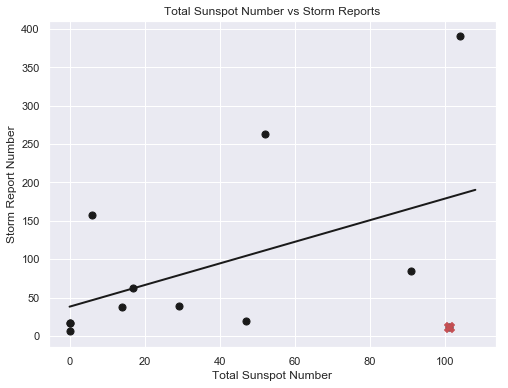

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score

y = np.array([strmrpt_nr_nov2019e, strmrpt_nr_nov2019l, strmrpt_nr_dec2019e, strmrpt_nr_dec2019l, strmrpt_nr_jan2020e,
             strmrpt_nr_jan2020l, strmrpt_nr_feb2020e, strmrpt_nr_feb2020l, strmrpt_nr_mar2020e, strmrpt_nr_mar2020l,
             strmrpt_nr_apr2020e, strmrpt_nr_apr2020l])
x = np.array([totsunspot_nr_nov2019e, totsunspot_nr_nov2019l, totsunspot_nr_dec2019e, totsunspot_nr_dec2019l,
             totsunspot_nr_jan2020e, totsunspot_nr_jan2020l, totsunspot_nr_feb2020e, totsunspot_nr_feb2020l,
             totsunspot_nr_mar2020e, totsunspot_nr_mar2020l, totsunspot_nr_apr2020e, totsunspot_nr_apr2020l])

#Select linear regression model for this study
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 108, 12)
yfit = model.predict(xfit[:, np.newaxis])
#Display scatterplot
fig = plt.figure(figsize=(8, 6))
plt.title('Total Sunspot Number vs Storm Reports')
plt.scatter(x, y, color='k',s=50)
plt.plot(xfit, yfit, linewidth=2.0, color='k');
plt.scatter(101,11,color='r',marker='X',s=100) #Plot outlier data point
plt.xlabel("Total Sunspot Number")
plt.ylabel("Storm Report Number")
plt.savefig("Model_TotalSunspots_StormReports.png",dpi=250,bbox_inches='tight')

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

#Calculate coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f (Best possible score is 1.0)"
      % r2_score(y,yfit))

#Calculate correlation coefficient
R = np.sqrt(r2_score(y,yfit))
print("Correlation Coefficient: %.2f (Best possible score is 1.0)" %R)

#Calculate explained variance regression score: 
#Proportion to which a model accounts for the variation of a data set
V_score = explained_variance_score(y,yfit)
print("Explained Variance = %.2f (Best possible score is 1.0)" %V_score)

print("X marks the outlier data point")


## Build and train linear regression model: scatterplot of mean sunspot number vs storm report number; calculate correlation and explained variance scores to assess model performance.

Model slope:     22.80867151737222
Model intercept: 35.086898392101624
Coefficient of determination: 0.36 (Best possible score is 1.0)
Correlation Coefficient: 0.60 (Best possible score is 1.0)
Explained Variance = 0.41 (Best possible score is 1.0)


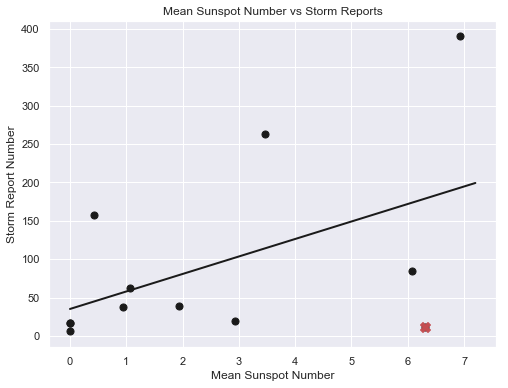

In [12]:
y = np.array([strmrpt_nr_nov2019e, strmrpt_nr_nov2019l, strmrpt_nr_dec2019e, strmrpt_nr_dec2019l, strmrpt_nr_jan2020e,
             strmrpt_nr_jan2020l, strmrpt_nr_feb2020e, strmrpt_nr_feb2020l, strmrpt_nr_mar2020e, strmrpt_nr_mar2020l,
             strmrpt_nr_apr2020e, strmrpt_nr_apr2020l])
x = np.array([meansunspot_nr_nov2019e, meansunspot_nr_nov2019l, meansunspot_nr_dec2019e, meansunspot_nr_dec2019l,
             meansunspot_nr_jan2020e, meansunspot_nr_jan2020l, meansunspot_nr_feb2020e, meansunspot_nr_feb2020l,
             meansunspot_nr_mar2020e, meansunspot_nr_mar2020l, meansunspot_nr_apr2020e, meansunspot_nr_apr2020l])

#Select linear regression model for this study
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 7.2, 12)
yfit = model.predict(xfit[:, np.newaxis])
#Display scatterplot
fig = plt.figure(figsize=(8, 6))
plt.title('Mean Sunspot Number vs Storm Reports')
plt.scatter(x, y, color='k',s=50)
plt.plot(xfit, yfit, linewidth=2.0, color='k');
plt.scatter(6.3125,11,color='r',marker='X',s=100) #Plot outlier data point
plt.xlabel("Mean Sunspot Number")
plt.ylabel("Storm Report Number")
plt.savefig("Model_MeanSunspots_StormReports.png",dpi=250,bbox_inches='tight')

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

#Calculate coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f (Best possible score is 1.0)"
      % r2_score(y,yfit))

#Calculate correlation coefficient
R = np.sqrt(r2_score(y,yfit))
print("Correlation Coefficient: %.2f (Best possible score is 1.0)" %R)

#Calculate explained variance regression score: 
#Proportion to which a model accounts for the variation of a data set
V_score = explained_variance_score(y,yfit)
print("Explained Variance = %.2f (Best possible score is 1.0)" %V_score)


<img src= "images/table2_schlegel.png"> 
### Figure 2. Table 2 from Schlegel et al. (2001).

## Discussion/Summary:

Thunderstorm wind reports over CONUS were obtained via WxData API (https://wxdata.com/api-storm-reports-explorer), and corresponding daily sunspot number values were obtained from the Sunspot Index and Long-term Solar Observations (SILSO) website (http://sidc.be/silso/datafiles). The total number of wind reports was calculated for each semi-monthly period between November 2019 and April 2020 and compared to the sum of daily sunspot number values for each semi-monthly period. For the study period (November 2019 - April 2020), regression metrics were calculated for a dataset of 12 storm wind report and sunspot number totals. The correlation coefficient of 0.6 between the thunderstorm wind report and sunspot number total for each semi-monthly period is consistent with the results of Schlegel et al. (2001) that documented correlation coefficients of 0.53 and 0.65 between monthly lightning stroke (delta) number and sunspot number (R) over an entire solar cycle (1992-2000). Also, explained variance values of 0.39 to 0.41 show that sunspot activity could function as one of at least three crucial forcing factors for cold season thunderstorms, in addition to atmospheric instability and weather patterns.
In summary, this study entailed a short-term analysis of thunderstorm reports and sunspot number measurements, binned into semi-monthly segments over the first six months of solar cycle 25 and during the cold season. The correlation of 0.6 for both semi-monthly total and mean sunspot numbers demonstrates a significant functional relationship between sunspot and cold-season thunderstorm activity over CONUS that can serve as a starting point for more detailed studies of the relationship between solar cycles and the intensity of regional convective storm activity.

## Limitations/Future Work:
An outlier in this dataset is the low storm wind report total for January 16-31 2020, marked by a red "X" in the scatterplots. Although the sunspot number for this period was relatively high, the low number of wind events, recorded over offshore ocean waters, suggested that the majority of severe thunderstorm activity occurred over subtropical open ocean waters where weather observations are sparse relative to land areas. 

In order to derive a more robust functional relationship between sunspot number and thunderstorm activity over CONUS, this procedure will be conducted for cold seasons over an entire solar cycle (i.e., 11-year period).

## References:
Clette, F., Svalgaard, L., Vaquero, J.M. et al. Revisiting the Sunspot Number. Space Sci Rev 186, 35–103 (2014). https://doi.org/10.1007/s11214-014-0074-2

King, J. R., M. D. Parker, K. D. Sherburn, and G. M. Lackmann, 2017: Rapid Evolution of Cool Season, Low-CAPE Severe Thunderstorm Environments. Wea. Forecasting, 32, 763–779, https://doi.org/10.1175/WAF-D-16-0141.1.

Rao, Y. P., [Southwest Monsoon], India Meteorological Department, New Delhi, 2-5 (1976).

Schlegel, K., Diendorfer, G., Thern, S., & Schmidt, M. (2001). Thunderstorms, lightning and solar activity—Middle Europe. Journal of Atmospheric and Solar-Terrestrial Physics, 63(16), 1705-1713.

“The New Solar Activity Cycle.” Sunspot Index and Long-Term Solar Observations, Royal Observatory of Belgium, Brussels, 15 Sept. 2020, sidc.be/silso/node/167/#NewSolarActivity. 